# Proyecto U4: Detection of Cyber Trolls

### By: Jessica Arelys Rojas Palomino, Oscar David Hincapie Garcia

La finalidad del proyecto es determinar un modelo mediante redes neuronales recurrentes para clasificar tuits. Esta clasificación se hará siguiento las categorias: 1 (Cyber-Aggressive) 0 (Non Cyber-Aggressive) 

Este notebook presenta el preprocesamiento de los datos y la implementación de un modelo. El modelo se entrenará con el 75% de la base de datos y con el restante 25% se hará la predicción y validación.

In [2]:
import sys
import os
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm 
import itertools
from sklearn.metrics import confusion_matrix
from __future__ import division

## 1 Descarguemos los datos, en este caso la base de datos la compone una serie de Twits.
- Descargamos las imágenes desde Dropbox.

In [37]:
!wget https://www.dropbox.com/sh/p42gcd3h45og4s7/AABEmXNUB2bvE7cSNX7KRP_Ha?dl=0

--2019-06-03 13:17:23--  https://www.dropbox.com/sh/p42gcd3h45og4s7/AABEmXNUB2bvE7cSNX7KRP_Ha?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/p42gcd3h45og4s7/AABEmXNUB2bvE7cSNX7KRP_Ha [following]
--2019-06-03 13:17:23--  https://www.dropbox.com/sh/raw/p42gcd3h45og4s7/AABEmXNUB2bvE7cSNX7KRP_Ha
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44d91989d723a71931deb9a544.dl.dropboxusercontent.com/zip_by_token_key?key=AiIPyitkeD2ArSQiPMF8S-mVZXP4iBmjsxLITIUXbjERqYTYMfRzu4xhstSeOOE2CQAH8DIZNn9d-S_0LLylY81eKGU4c0QqPO8wdyYhD19HctKXZ6JdqN-F0PRw1JhoJ-kLP4xYMVaj9EPaQ-fFAceWiglxf3KSw5NeLnNwGT-8t3BiCf_RUB2C4AnjD63SUDpZ7hziOL-YyH-6Js2WnxbhrxPrOOMcHCVCPa-5CRHukA [following]
--2019-06-03 13:17:24--  https://uc44d91989d723a71931deb9

In [38]:
os.listdir(os.getcwd())

['AABEmXNUB2bvE7cSNX7KRP_Ha?dl=0',
 'AABEmXNUB2bvE7cSNX7KRP_Ha?dl=0.1',
 'Proyecto Final V1.ipynb',
 'Dataset for Detection of Cyber-Trolls.json',
 '.ipynb_checkpoints',
 'Proyecto Final V2.ipynb']

In [3]:
data = pd.read_json('Dataset for Detection of Cyber-Trolls.json',lines = True)
data.head(15)

,annotation,content,extras,metadata
0,"{u'notes': u'', u'label': [u'1']}",Get fucking real dude.,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
1,"{u'notes': u'', u'label': [u'1']}",She is as dirty as they come and that crook R...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
2,"{u'notes': u'', u'label': [u'1']}",why did you fuck it up. I could do it all day ...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
3,"{u'notes': u'', u'label': [u'1']}",Dude they dont finish enclosing the fucking sh...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
4,"{u'notes': u'', u'label': [u'1']}",WTF are you talking about Men? No men thats no...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
5,"{u'notes': u'', u'label': [u'1']}",Ill save you the trouble sister. Here comes a ...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
6,"{u'notes': u'', u'label': [u'1']}",Im dead serious.Real athletes never cheat don'...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
7,"{u'notes': u'', u'label': [u'1']}",...go absolutely insane.hate to be the bearer ...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
8,"{u'notes': u'', u'label': [u'1']}",Lmao im watching the same thing ahaha. The ga...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."
9,"{u'notes': u'', u'label': [u'1']}",LOL no he said What do you call a jail cell ...,NaN,"{u'status': u'done', u'sec_taken': 0, u'last_u..."


In [4]:
data.shape

(20001, 4)

## 2 Procesamiento de la base de datos para posteriormente evaluar un modelo RNN

In [6]:
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import Tokenizer

In [7]:
#!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#Corpus contains lists of each review in a format that can be used to create the bag of words
corpus = []

for i in range (0, len(data)):                                #Iterating over each review
    review = re.sub('[^a-zA-Z]',' ',data['content'][i])       #Removing annotations
    review = review.lower()                                 #Converting everything to lower case
    review = review.split()                                 #Splitting each word in a review into a separate list
    review = ' '.join(review)                               #Joining all the words into a single list
    corpus.append(review)                                   #Forming our Corpus

len(corpus)

20001

In [9]:
corpus

[u'get fucking real dude',
 u'she is as dirty as they come and that crook rengel the dems are so fucking corrupt it s a joke make republicans look like',
 u'why did you fuck it up i could do it all day too let s do it when you have an hour ping me later to sched writing a book here',
 u'dude they dont finish enclosing the fucking showers i hate half assed jobs whats the reasononing behind it makes no sense',
 u'wtf are you talking about men no men thats not a menage that s just gay',
 u'ill save you the trouble sister here comes a big ol fuck france block coming your way here on the twitter',
 u'im dead serious real athletes never cheat don t even have the appearance of at his level fuck him dude seriously i think he did',
 u'go absolutely insane hate to be the bearer of bad news lol dont shoot the messenger cause we all know you bought that pistol',
 u'lmao im watching the same thing ahaha the gay guy is hilarious dede having a good day and i dont want anyone to mess it up',
 u'lol no

In [10]:
# Cleaing the text for the GLOVE

aW=[]

for j in tqdm(range(data.shape[0])):  
#j=0
    all_sentences = nltk.sent_tokenize(corpus[j])
    all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
    for i in range(len(all_words)):
        all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]
    #print(len(all_words),type(all_words))
    if len(all_words) == 0:
        aW.append(all_words)
    else:
        aW.append(all_words[0])

100%|██████████| 20001/20001 [00:45<00:00, 440.03it/s]


In [11]:
aW

[[u'get', u'fucking', u'real', u'dude'],
 [u'dirty',
  u'come',
  u'crook',
  u'rengel',
  u'dems',
  u'fucking',
  u'corrupt',
  u'joke',
  u'make',
  u'republicans',
  u'look',
  u'like'],
 [u'fuck',
  u'could',
  u'day',
  u'let',
  u'hour',
  u'ping',
  u'later',
  u'sched',
  u'writing',
  u'book'],
 [u'dude',
  u'dont',
  u'finish',
  u'enclosing',
  u'fucking',
  u'showers',
  u'hate',
  u'half',
  u'assed',
  u'jobs',
  u'whats',
  u'reasononing',
  u'behind',
  u'makes',
  u'sense'],
 [u'wtf', u'talking', u'men', u'men', u'thats', u'menage', u'gay'],
 [u'ill',
  u'save',
  u'trouble',
  u'sister',
  u'comes',
  u'big',
  u'ol',
  u'fuck',
  u'france',
  u'block',
  u'coming',
  u'way',
  u'twitter'],
 [u'im',
  u'dead',
  u'serious',
  u'real',
  u'athletes',
  u'never',
  u'cheat',
  u'even',
  u'appearance',
  u'level',
  u'fuck',
  u'dude',
  u'seriously',
  u'think'],
 [u'go',
  u'absolutely',
  u'insane',
  u'hate',
  u'bearer',
  u'bad',
  u'news',
  u'lol',
  u'dont',
 

In [12]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(aW)
X = tokenizer.texts_to_sequences(aW)

In [13]:
X

[[8, 10, 179, 67],
 [669, 94, 10, 637, 38, 86, 6],
 [5, 49, 47, 96, 416, 1907, 452, 710, 322],
 [67, 42, 1102, 10, 1741, 1, 297, 923, 310, 792, 131, 545],
 [241, 244, 670, 670, 76, 19],
 [288, 585, 793, 532, 406, 72, 1333, 5, 1742, 1502, 259, 48, 79],
 [24, 279, 469, 179, 69, 51, 1908, 1614, 5, 67, 273, 14],
 [26, 1154, 1002, 1, 53, 453, 7, 42, 1334, 149, 12, 586],
 [83, 24, 352, 50, 818, 19, 90, 711, 20, 47, 42, 30, 190, 600],
 [7, 93, 95, 1743, 1335, 19, 90, 818],
 [959, 90, 3, 1615, 1909, 70, 18, 173],
 [65],
 [10],
 [570, 5, 304],
 [2, 170, 398, 13],
 [91, 2, 11, 533],
 [370, 9, 83, 5, 132, 1503],
 [4],
 [196, 323, 1043, 298, 43, 385, 1910],
 [186, 2, 20],
 [2, 1103, 1044, 1911, 33],
 [10, 373, 960, 14, 571, 486, 1616, 154],
 [75, 32, 5, 762],
 [1260, 15, 587],
 [8, 22, 712],
 [327, 182, 234, 70, 32, 1003, 1, 1155, 26, 192],
 [454, 893, 1407, 3, 732, 105, 1104, 180, 274, 6, 1104, 407, 193, 1203],
 [34, 1336, 4, 1912, 54, 1744, 67, 75, 127, 43],
 [116, 89, 3],
 [76, 75, 2, 143, 509,

In [14]:
tokenizer.index_word

{1: u'hate',
 2: u'damn',
 3: u'ass',
 4: u'sucks',
 5: u'fuck',
 6: u'like',
 7: u'lol',
 8: u'get',
 9: u'u',
 10: u'fucking',
 11: u'would',
 12: u'know',
 13: u'one',
 14: u'think',
 15: u'bitch',
 16: u'love',
 17: u'haha',
 18: u'people',
 19: u'gay',
 20: u'good',
 21: u'got',
 22: u'fat',
 23: u'time',
 24: u'im',
 25: u'really',
 26: u'go',
 27: u'yeah',
 28: u'oh',
 29: u'well',
 30: u'want',
 31: u'yes',
 32: u'much',
 33: u'right',
 34: u'man',
 35: u'still',
 36: u'see',
 37: u'ever',
 38: u'make',
 39: u'na',
 40: u'ur',
 41: u'shit',
 42: u'dont',
 43: u'say',
 44: u'r',
 45: u'going',
 46: u'need',
 47: u'day',
 48: u'way',
 49: u'could',
 50: u'thing',
 51: u'even',
 52: u'back',
 53: u'bad',
 54: u'work',
 55: u'life',
 56: u'last',
 57: u'http',
 58: u'better',
 59: u'p',
 60: u'com',
 61: u'dick',
 62: u'feel',
 63: u'though',
 64: u'always',
 65: u'nerd',
 66: u'sorry',
 67: u'dude',
 68: u'new',
 69: u'never',
 70: u'tell',
 71: u'something',
 72: u'big',
 73: u't

In [15]:
y = []
for i in range(0,len(data)):
    y.append(int(data.annotation[i]['label'][0]))           #Extracting labels from our dataset (From the dictionary)
y = pd.DataFrame(y,columns = ['Label'])
y

,Label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [16]:
print(y.Label.unique())
for n, df in y.groupby(['Label']):
    print(n,df.Label.count())

[1 0]
(0, 12179)
(1, 7822)


In [17]:
from keras.preprocessing.sequence import pad_sequences
Xpad=pad_sequences(X,padding='post')
voc=Xpad[0].size
print('El tamaño maximo de la secuencia es '+ str(Xpad[0].size))

El tamaño maximo de la secuencia es 102


In [18]:
n_words = [len(x) for x in X]
n_words[0:10]

[4, 7, 9, 12, 6, 13, 12, 12, 14, 8]

In [19]:
import numpy as np
print(max(n_words),min(n_words),np.mean(n_words),int(np.ceil(np.mean(n_words))))
n_mean_words = int(np.ceil(np.mean(n_words)))

(102, 0, 5.487975601219939, 6)


### Revisemos la cantidad de palabras que tenemos por cada tuit, de esta manera, podremos definir un valor máximo para realizar el pad_secuences

(0, 21)

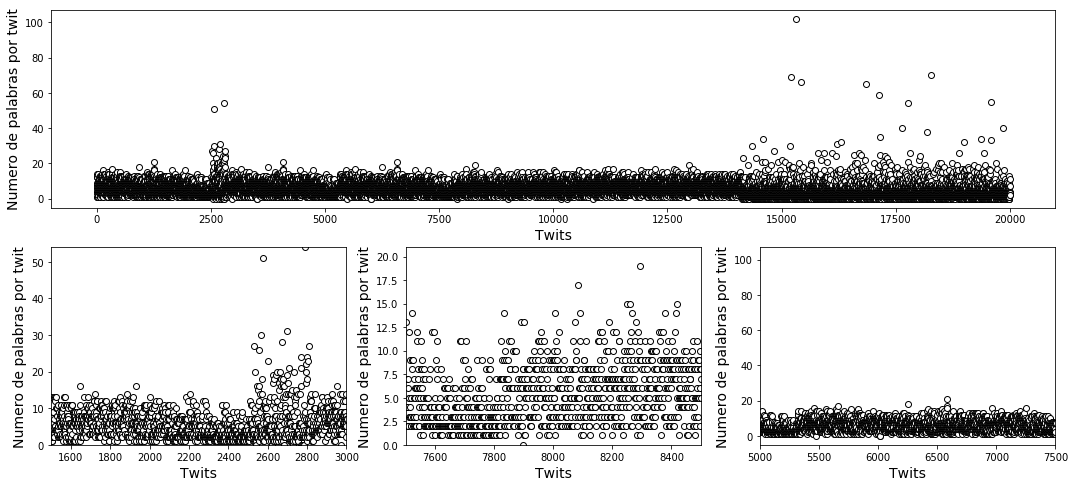

In [26]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize = (18,8))
ax_total = fig.add_subplot(gs[0,:])
ax_1 = fig.add_subplot(gs[1,0])
ax_2 = fig.add_subplot(gs[1,1])
ax_3 = fig.add_subplot(gs[1,2])
ax_total.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_total.set_xlabel('Twits',fontsize = 14)
ax_total.set_ylabel('Numero de palabras por twit',fontsize = 14)

ax_1.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_1.set_xlabel('Twits',fontsize = 14)
ax_1.set_ylabel('Numero de palabras por twit',fontsize = 14)
ax_1.set_xlim([1500,3000])
ax_1.set_ylim([0,max(n_words[1500:3000])])

ax_2.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_2.set_xlabel('Twits',fontsize = 14)
ax_2.set_ylabel('Numero de palabras por twit',fontsize = 14)
ax_2.set_xlim([7500,8500])
ax_2.set_ylim([0,max(n_words[7500:8500])])

ax_3.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_3.set_xlabel('Twits',fontsize = 14)
ax_3.set_ylabel('Numero de palabras por twit',fontsize = 14)
ax_3.set_xlim([5000,7500])
ax_2.set_ylim([0,max(n_words[5000:7500])])

Un número apropiado a tener en cuenta como cantidad máxima de las secuencias es de 25

In [27]:
Xpad=pad_sequences(X,padding='post',maxlen = 25)
voc=Xpad[0].size
print('El tamaño maximo de la secuencia es '+ str(Xpad[0].size))

El tamaño maximo de la secuencia es 25


In [28]:
np.array(X[4]),Xpad[4]

(array([241, 244, 670, 670,  76,  19]),
 array([241, 244, 670, 670,  76,  19,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=int32))

In [29]:
Xpad[0:4]

array([[   8,   10,  179,   67,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 669,   94,   10,  637,   38,   86,    6,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   5,   49,   47,   96,  416, 1907,  452,  710,  322,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  67,   42, 1102,   10, 1741,    1,  297,  923,  310,  792,  131,
         545,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]], dtype=int32)

### Notas a tener en cuenta: 
1. Encontrar el promedio de mean(len(X_i)) donde X_i es cada uno de los twits.
2. Tokenizer asigna un numero a cada palabra, repreesntar las palabras como enteros no es la mejor forma de representar los datos, por eso se usa un modelo con una capa Embedding.
2. No ajustaron el orden de los vectores de GoV con respecto al tokenizador usado para crear el conjunto de datos de entrenamiento

# 3. Creemos el modelo

In [30]:
from keras.layers import Dense,LSTM,Dropout,GRU,SimpleRNN,Embedding
from keras.models import Sequential
from sklearn.model_selection import train_test_split
# 33% Para test
X_train, X_test, y_train, y_test = train_test_split(Xpad, y, test_size=0.25)

In [41]:
model_init =Sequential()
model_init.add(Embedding(2000,32,input_length=voc,mask_zero=True))
model_init.compile('adam','mse')
output=model_init.predict(Xpad)
output.shape

(20001, 25, 32)

In [54]:
model1 =Sequential()
model1.add(Embedding(2000,32,input_length=voc,mask_zero=True))
model1.add(LSTM(units=64, input_shape=output.shape))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))
model1.compile('adam','mse',metrics=['acc'])
h1=model1.fit(X_train,y_train,epochs=12, batch_size=32,validation_data=(X_test,y_test))

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 44s 3ms/step - loss: 0.1953 - acc: 0.6878 - val_loss: 0.1773 - val_acc: 0.7059
Epoch 2/12
15000/15000 [==============================] - 39s 3ms/step - loss: 0.1553 - acc: 0.7755 - val_loss: 0.1700 - val_acc: 0.7401
Epoch 3/12
15000/15000 [==============================] - 43s 3ms/step - loss: 0.1371 - acc: 0.8093 - val_loss: 0.1594 - val_acc: 0.7770
Epoch 4/12
15000/15000 [==============================] - 57s 4ms/step - loss: 0.1228 - acc: 0.8367 - val_loss: 0.1562 - val_acc: 0.7964
Epoch 5/12
15000/15000 [==============================] - 47s 3ms/step - loss: 0.1093 - acc: 0.8612 - val_loss: 0.1528 - val_acc: 0.8000
Epoch 6/12
15000/15000 [==============================] - 38s 3ms/step - loss: 0.0962 - acc: 0.8806 - val_loss: 0.1534 - val_acc: 0.8112
Epoch 7/12
15000/15000 [==============================] - 39s 3ms/step - loss: 0.0857 - acc: 0.8970 - val_loss: 0.1584 - val_acc:

Text(0,0.5,u'Loss')

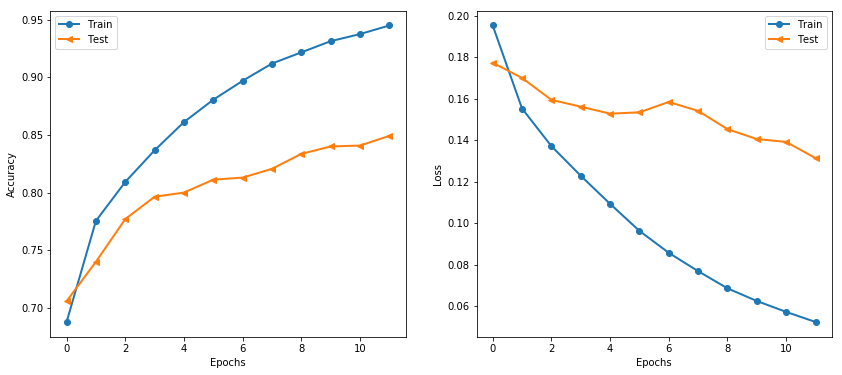

In [55]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(h1.history['acc'],label='Train',linewidth=2,marker = 'o')
plt.plot(h1.history['val_acc'],label='Test',linewidth=2,marker = '<')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(h1.history['loss'],label='Train',linewidth=2,marker = 'o')
plt.plot(h1.history['val_loss'],label='Test',linewidth=2,marker = '<')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [61]:
y_pred = model1.predict(X_test)
y_pred[y_pred<0.5]=0
y_pred[y_pred>0.5]=1
y_pred

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [77]:
flat_y_pred = [ys[0] for ys in y_pred]
df_y_pred = pd.DataFrame(flat_y_pred,columns = ['Y_pred'])
for nam,df_p in df_y_pred.groupby(['Y_pred']):
    print(nam,df_p.Y_pred.count())

(0.0, 2793)
(1.0, 2208)


In [86]:
df_y_test = pd.DataFrame(y_test.values,columns = ['Y_test'])
for nam, df_t in df_y_test.groupby(['Y_test']):
    print(nam,df_t.Y_test.count())

(0, 3023)
(1, 1978)


In [79]:
print('Precision: ',accuracy_score(y_test, flat_y_pred))

('Precision: ', 0.849630073985203)


1 (Cyber-Aggressive) 0 (Non Cyber-Aggressive) 

In [87]:
from sklearn.metrics import classification_report, accuracy_score

target_names = ['Non Cyber-Aggresive','Cyber.Agressive']
print(classification_report(y_test,flat_y_pred, target_names=target_names))   #Results



                     precision    recall  f1-score   support

Non Cyber-Aggresive       0.91      0.84      0.87      3023
    Cyber.Agressive       0.78      0.87      0.82      1978

        avg / total       0.86      0.85      0.85      5001

